# Customer Churn 

# Setup & data loading 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [52]:
# Load data
csv_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
if not os.path.exists(csv_path):
	raise FileNotFoundError(f"File not found: {csv_path}. Make sure the CSV file is in the notebook working directory: {os.getcwd()}")
df = pd.read_csv(csv_path)

In [53]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# Data quality checks

In [56]:
misisng_values = df.isnull().sum()
print("Missing values in each column:")
print(misisng_values)

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [57]:
df.drop_duplicates(inplace=True)


In [58]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# data cleaning 

In [59]:
# fix 'totalcharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Missing values in 'TotalCharges' after conversion: {missing_total_charges}")

Missing values in 'TotalCharges' after conversion: 11


In [60]:
# Drop rows with missing 'TotalCharges' values
df.dropna(subset=['TotalCharges'], inplace=True)

In [61]:
drop_cols = ['customerID']
df.drop(columns=drop_cols, inplace=True)

In [62]:
# separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Identifying the Churn Drivers

## Which customers are likely to churn?

/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_30516/757897186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


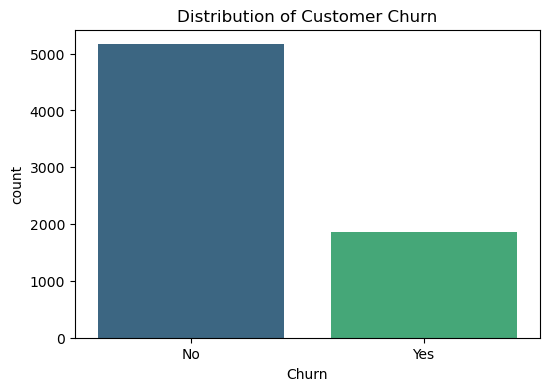

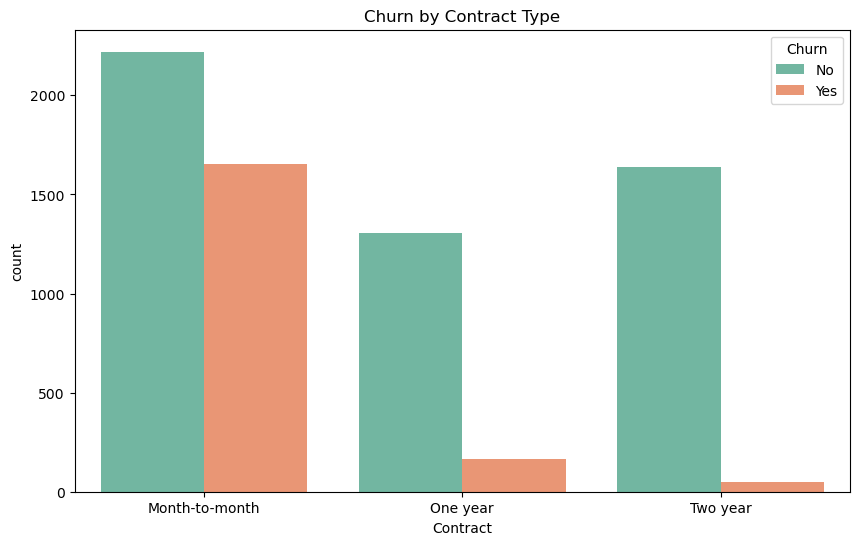

In [63]:
# 1. Visualize Churn Distribution (Class Imbalance)
plt.figure(figsize=(6, 4))
# ensure palette is provided as a string name supported by seaborn/matplotlib
# using 'viridis' to avoid any undefined-name issues
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Customer Churn')
plt.show()

# 2. The "Smoking Gun": Contract Type vs Churn
plt.figure(figsize=(10, 6))
# use hue='Churn' to color by churn
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()


# Monthly Charges vs Churn

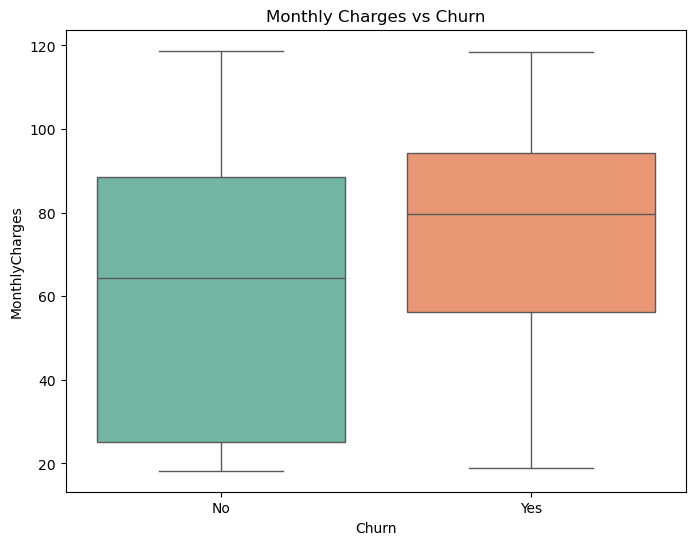

In [64]:
plt.figure(figsize=(8, 6))

# Adding hue='Churn' and legend=False tells Seaborn to color the boxes 
# and prevents an unnecessary legend from appearing on the side.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2', legend=False)

plt.title('Monthly Charges vs Churn')
plt.show()


# Analyzing Numerical Relationships 
### Does paying more make you leave ?Do new customers leave faster ?

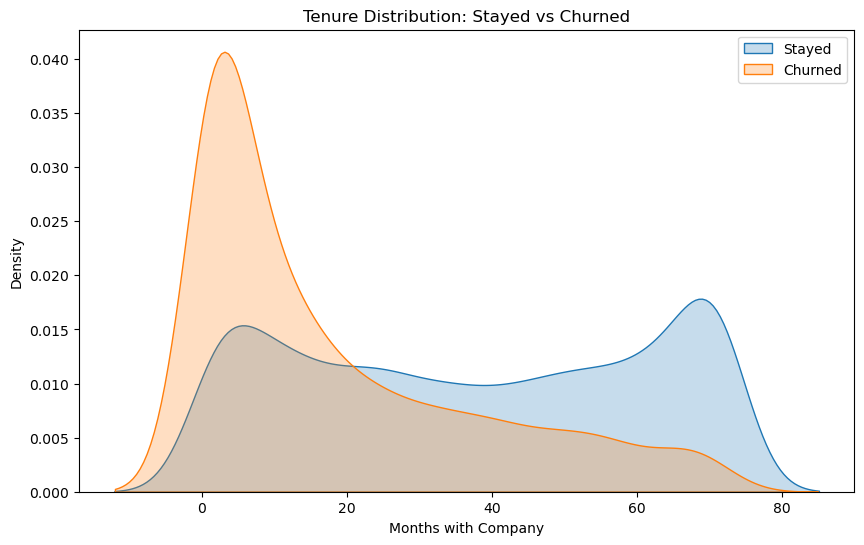

In [65]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Stayed', fill=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churned', fill=True)
plt.title('Tenure Distribution: Stayed vs Churned')
plt.xlabel('Months with Company')
plt.legend()
plt.show()


# Correlation Heat Map

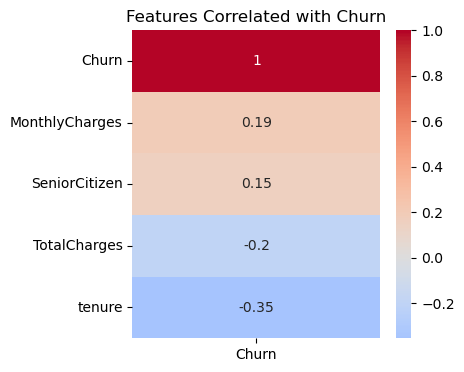

In [66]:
# Quick conversion for correlation check
df_temp = df.copy()

# Convert TotalCharges to numeric (there are string values), coerce errors to NaN
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

# Map target to numeric
df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric columns only to avoid non-numeric fields like customerID
num_cols = df_temp.select_dtypes(include=['number']).columns.tolist()
# Ensure 'Churn' is present
if 'Churn' not in num_cols:
    num_cols.append('Churn')

# Correlation with the target
churn_corr = df_temp[num_cols].corr()[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(4, max(4, len(churn_corr) * 0.4)))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Features Correlated with Churn')
plt.show()


# Overall Churn rate 

In [67]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

# Churn Rate by Contract type

In [69]:
contract_churn = (
    df.groupby('Contract')['Churn']
      .value_counts(normalize=True)
      .unstack()
      * 100
)

contract_churn.round(2)

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85


# Median Charges vs Tenure 

In [70]:
df['Churn'].value_counts(normalize=True)

df.groupby('Contract')['Churn'].value_counts(normalize=True)

df.groupby('Churn')[['MonthlyCharges','tenure']].median()

,MonthlyCharges,tenure
Churn,,
No,64.45,38.0
Yes,79.65,10.0


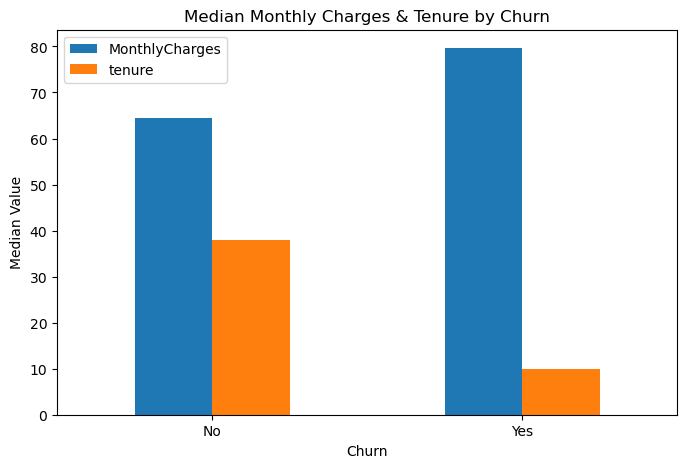

In [71]:
summary = df.groupby('Churn')[['MonthlyCharges','tenure']].median()

summary.plot(kind='bar', figsize=(8,5))
plt.title('Median Monthly Charges & Tenure by Churn')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.show()

In [72]:
# === SUMMARY OF KEY INSIGHTS ===

print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print(f"\n1️⃣ OVERALL CHURN:")
print(f"   • Churn Rate: {churn_rate:.2f}%")
print(f"   • Class imbalance present → Focus on RECALL metric")

print(f"\n2️⃣ CONTRACT TYPE (Strongest Predictor):")
print(f"   • Month-to-month: {contract_churn.loc['Month-to-month', 'Yes']:.1f}% churn")
print(f"   • Two year: {contract_churn.loc['Two year', 'Yes']:.1f}% churn")
print(f"   • {contract_churn.loc['Month-to-month', 'Yes'] / contract_churn.loc['Two year', 'Yes']:.1f}X higher risk for month-to-month!")

print(f"\n3️⃣ TENURE (Customer Loyalty):")
print(f"   • Churned: {tenure_churned:.0f} months median")
print(f"   • Retained: {tenure_stayed:.0f} months median")
print(f"   • First 12 months are critical!")

print(f"\n4️⃣ MONTHLY CHARGES (Price Sensitivity):")
print(f"   • Churned pay ${diff:.2f} more on average")
print(f"   • Higher prices correlate with higher churn")

print(f"\n5️⃣ CORRELATION ANALYSIS:")
print(f"   • tenure: strongest negative correlation")
print(f"   • MonthlyCharges: positive correlation with churn")

print("\n" + "="*80)
print("BUSINESS RECOMMENDATIONS")
print("="*80)
print("1. Incentivize long-term contracts (target month-to-month customers)")
print("2. Focus retention on first 12 months (onboarding programs)")
print("3. Review pricing for high-paying customers (loyalty discounts)")
print("4. Build ML model to identify at-risk customers early")
print("="*80)



KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1️⃣ OVERALL CHURN:
   • Churn Rate: 26.58%
   • Class imbalance present → Focus on RECALL metric

2️⃣ CONTRACT TYPE (Strongest Predictor):
   • Month-to-month: 42.7% churn
   • Two year: 2.8% churn
   • 15.0X higher risk for month-to-month!

3️⃣ TENURE (Customer Loyalty):
   • Churned: 10 months median
   • Retained: 38 months median
   • First 12 months are critical!

4️⃣ MONTHLY CHARGES (Price Sensitivity):
   • Churned pay $13.13 more on average
   • Higher prices correlate with higher churn

5️⃣ CORRELATION ANALYSIS:
   • tenure: strongest negative correlation
   • MonthlyCharges: positive correlation with churn

BUSINESS RECOMMENDATIONS
1. Incentivize long-term contracts (target month-to-month customers)
2. Focus retention on first 12 months (onboarding programs)
3. Review pricing for high-paying customers (loyalty discounts)
4. Build ML model to identify at-risk customers early
